In [ ]:
import librosa

In [ ]:
import glob
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
%matplotlib inline
plt.style.use('ggplot')

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 11
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 11
plt.rcParams['figure.titlesize'] = 13

In [ ]:
import numpy as np

In [ ]:
x = np.array(['1', '2', '2'])

In [ ]:
x.astype(int)


In [ ]:
from tempfile import TemporaryFile


In [ ]:
outfile = TemporaryFile()
np.save(outfile, x)

In [ ]:
outfile.seek(0)

In [ ]:
np.load(outfile)

In [ ]:
from numpy import *
 
array_len = 10000000
 
a = zeros(array_len, dtype=float)
 
import pickle
f = open('test.pickle', 'wb')
pickle.dump(a, f, pickle.HIGHEST_PROTOCOL)
f.close()
 

In [ ]:
import pickle
pkl_file = open('test.pickle', 'rb')
data1=pickle.load(pkl_file)

In [ ]:
print(data1)

In [ ]:
import numpy as np
import h5py
a = np.random.random(size=(100,20))
h5f = h5py.File('data.h5', 'w')
h5f.create_dataset('dataset_1', data=a)
h5f.close()

In [ ]:
h5f = h5py.File('data.h5','r')
b = h5f['dataset_1'][:]
h5f.close()
np.allclose(a,b)

In [ ]:
print(b)

In [1]:
import pickle
pkl_file = open('Lables.pickle', 'rb')
data1=pickle.load(pkl_file)
pkl_file = open('Features.pickle', 'rb')
data2=pickle.load(pkl_file)

In [2]:
print(data1.shape)

(6048,)


In [3]:
print(data2.shape)

(6048, 193)


In [4]:
print(data1)

[ 1  1  1 ..., 36 36 36]


In [5]:
for i,j in enumerate(data1):
    if j==36:
        data1[i]=0

In [6]:
print(data1)

[1 1 1 ..., 0 0 0]


In [7]:
labels=data1
features=data2
import numpy as np

In [8]:
def one_hot_encode(labels):
    n_labels = len(labels)
    n_unique_labels = len(np.unique(labels))
    one_hot_encode = np.zeros((n_labels,n_unique_labels))
    one_hot_encode[np.arange(n_labels), labels] = 1
    return one_hot_encode

In [9]:
labels = one_hot_encode(labels)

train_test_split = np.random.rand(len(features)) < 0.70
train_x = features[train_test_split]
train_y = labels[train_test_split]
test_x = features[~train_test_split]
test_y = labels[~train_test_split]

In [10]:
print(train_x.shape,train_y.shape,test_x.shape,test_y.shape)

(4244, 193) (4244, 36) (1804, 193) (1804, 36)


In [11]:
import tensorflow as tf
from sklearn.metrics import precision_recall_fscore_support

In [18]:
training_epochs = 15000
n_dim = features.shape[1]
print(n_dim)
n_classes = 36
n_hidden_units_one = 280 
n_hidden_units_two = 300
sd = 1 / np.sqrt(n_dim)
learning_rate = 0.01

193


In [19]:
X = tf.placeholder(tf.float32,[None,n_dim])
Y = tf.placeholder(tf.float32,[None,n_classes])

W_1 = tf.Variable(tf.random_normal([n_dim,n_hidden_units_one], mean = 0, stddev=sd))
b_1 = tf.Variable(tf.random_normal([n_hidden_units_one], mean = 0, stddev=sd))
h_1 = tf.nn.tanh(tf.matmul(X,W_1) + b_1)
W_2 = tf.Variable(tf.random_normal([n_hidden_units_one,n_hidden_units_two], mean = 0, stddev=sd))
b_2 = tf.Variable(tf.random_normal([n_hidden_units_two], mean = 0, stddev=sd))
h_2 = tf.nn.sigmoid(tf.matmul(h_1,W_2) + b_2)


W = tf.Variable(tf.random_normal([n_hidden_units_two,n_classes], mean = 0, stddev=sd))
b = tf.Variable(tf.random_normal([n_classes], mean = 0, stddev=sd))
y_ = tf.nn.softmax(tf.matmul(h_2,W) + b)

init = tf.global_variables_initializer()

In [20]:
cost_function = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(y_), reduction_indices=[1])) 
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

correct_prediction = tf.equal(tf.argmax(y_,1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [21]:
cost_history = np.empty(shape=[1],dtype=float)
y_true, y_pred = None, None
with tf.Session() as sess:
    sess.run(init)
    #print('yes')
    for epoch in range(training_epochs):            
        _,cost = sess.run([optimizer,cost_function],feed_dict={X:train_x,Y:train_y})
        cost_history = np.append(cost_history,cost)
    
    y_pred = sess.run(tf.argmax(y_,1),feed_dict={X: test_x})
    y_true = sess.run(tf.argmax(test_y,1))

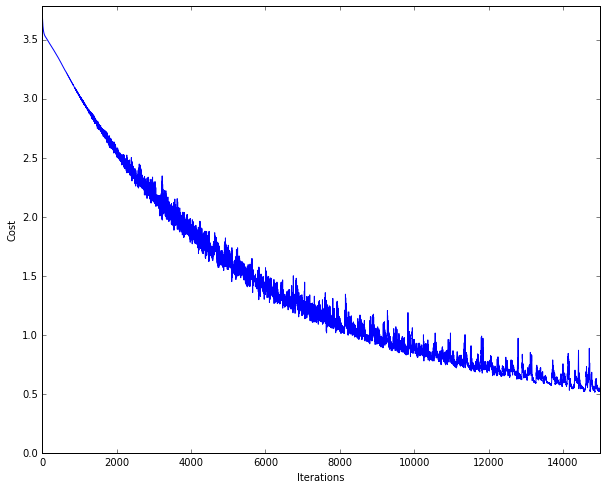

F-Score: 0.829


In [22]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,8))
plt.plot(cost_history)
plt.ylabel("Cost")
plt.xlabel("Iterations")
plt.axis([0,training_epochs,0,np.max(cost_history)])
plt.show()

p,r,f,s = precision_recall_fscore_support(y_true, y_pred, average='micro')
print ("F-Score:", round(f,3))